# 1)PIPELINE: Sourcing and loading

In [1]:
import pandas as pd
import numpy as np
Tweet= pd.read_csv('tweet_datasensitive_notshared.csv')
print(Tweet.isnull().sum())
print("total number of Rows and Columns in the dataframe: " , Tweet.shape)

tweetID            0
crDate             0
edInput            0
editor             0
engages            0
isApproved         0
isEdNeed           0
isRT               0
likes              0
photoUrl      508020
retweets           0
rtUsID             0
text               0
topicName          0
usFlwrs            0
usID               0
usName             0
videoUrl      645425
dtype: int64
total number of Rows and Columns in the dataframe:  (785916, 18)


# 2)PIPELINE: Data Examining ,Cleaning , Visualizing and Preprocessing

In [2]:
#Fixed the dataframe by dropping the unnecessary columns.       
Tweet= Tweet.drop(['tweetID', 'editor', 'engages', 'isApproved',
       'isEdNeed', 'isRT', 'likes', 'photoUrl', 'retweets', 'rtUsID', 'usFlwrs', 'usID', 'usName', 'videoUrl'], axis=1)
Tweet

,crDate,edInput,text,topicName
0,2018-12-07 02:27:55,-1,The immediate impulse for an alliance of the E...,Business
1,2018-12-07 02:30:05,-1,America's economy is flashing some warning sig...,Business
2,2018-12-07 02:30:04,-1,Lyft files for what is expected to be one of t...,Business
3,2018-12-07 02:30:00,-1,"Exporters still waiting to get Rs 6,000 crore ...",Business
4,2018-12-07 02:30:00,-1,Ride-hailing firm Lyft races to leave Uber beh...,Business
...,...,...,...,...
785911,2019-07-06 02:06:13,-1,Relations are DIFFERENT\nnot DIFFICULT.,Motivational
785912,2019-07-22 06:04:39,-1,"""to live a creative life, we must lose our fea...",Interesting
785913,2019-07-21 21:07:11,-1,Who's your comic crush? https://t.co/H29dhXw3kf,Memes
785914,2019-07-24 16:17:27,-1,"After a flight of 195 hours, 18 minutes, 35 se...",Random


In [3]:
# just to have an idea of what is happening in particuar columns
print(Tweet['edInput'].value_counts())
print('It is observed that there are other numbers which classification is undefined even though "-1" has the highest values!!!!\n that indicates the imbalanced data!!!!!!!!!!!!!')
print("-----"*8)

print(Tweet['topicName'].value_counts())
print('It is observed that the "Business" class from the column, topicName, has the highest values of all!!!')

-1    422665
 1    215577
 2    106741
 4     32733
 3      8200
Name: edInput, dtype: int64
It is observed that there are other numbers which classification is undefined even though "-1" has the highest values!!!!
 that indicates the imbalanced data!!!!!!!!!!!!!
----------------------------------------
Business                    164602
News                        131973
Motivational                 84750
Technology                   47679
Design & Architecture        44987
Cryptocurrency               38623
Art                          36697
Interesting                  28615
Animal                       28202
Memes                        26349
Nature                       25021
Photography                  23638
DIY & Craft                  22392
Space                        14226
Funny                        13654
Travel                       13215
Random                       11825
Editorial Pics               11026
Flowers                       9450
Mindfulness                   

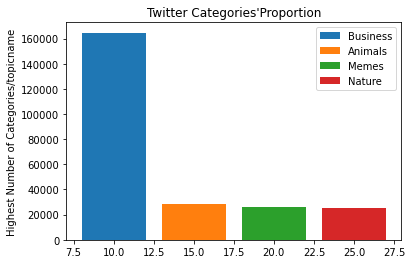

----------------------------------------------------------------
Since the topicName: “Business” category, is the highest, it is decided to develop an ML model from this category.


In [4]:
from matplotlib import pyplot as plt, pyplot
# extracting the number of examples of each class
Tweet_Bus = Tweet[Tweet['topicName'] == 'Business'].shape[0]
Tweet_Ani = Tweet[Tweet['topicName'] == 'Animal'].shape[0]
Tweet_Mem = Tweet[Tweet['topicName'] == 'Memes'].shape[0]
Tweet_Natu = Tweet[Tweet['topicName'] == 'Nature'].shape[0]

# bar plot of the 3 classes
plt.bar(10,Tweet_Bus,4, label="Business")
plt.bar(15,Tweet_Ani,4, label="Animals")
plt.bar(20,Tweet_Mem,4, label="Memes")
plt.bar(25,Tweet_Natu,4, label="Nature")
plt.legend()
plt.ylabel('Highest Number of Categories/topicname')
plt.title("Twitter Categories'Proportion")
plt.show()
print("--------"*8)
print("Since the topicName: “Business” category, is the highest, it is decided to develop an ML model from this category.")

Still the binary classes show a lot of imbalance in the data as the minority class is crossing the general rule of
 thumb, such as: 'a common rule of thumb is that if the minority class in the dataset should constitute less than 10-20% to be considered balanced.'


,count,percentage
1,28557,0.700871
2,12188,0.299129


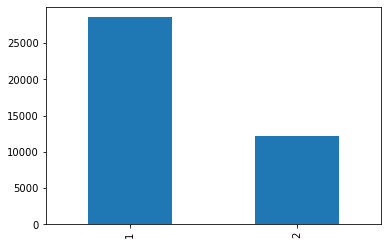

In [5]:
# Defined the values to replace
replace_dict = {3: -1, 4:1 }

# Replaced the values in the DataFrame
Tweet['edInput'].replace(replace_dict, regex=True, inplace=True)
# specified the column name and the values to drop that are useless and duplicates for model building
column_name = "edInput"
values_to_drop = [-1]

# filter out the rows that contain the values to drop
Tweet = Tweet[~Tweet[column_name].isin(values_to_drop)]
Tweet_Bus = Tweet.loc[(Tweet['topicName'] =='Business')]
# ref: https://www.statology.org/pandas-loc-multiple-conditions/

Tweet_Bus['edInput'].value_counts().plot(kind = 'bar')
print("Still the binary classes show a lot of imbalance in the data as the minority class is crossing the general rule of\n thumb, such as: 'a common rule of thumb is that if the minority class in the dataset should constitute less than 10-20% to be considered balanced.'")
# https://www.justintodata.com/imbalanced-data-machine-learning-classification/
# https://datascience.stackexchange.com/questions/122571/determining-whether-a-dataset-is-imbalanced-or-not#:~:text=There%20isn%27t%20a%20universally%20agreed%20upon%20threshold%20for,your%20total%20data%2C%20it%20can%20be%20considered%20imbalanced.
counts = Tweet_Bus.edInput.value_counts()
percs = Tweet_Bus.edInput.value_counts(normalize=True)
pd.concat([counts, percs], axis=1, keys=['count', 'percentage'])
# # https://www.datacamp.com/tutorial/diving-deep-imbalanced-data



# 3)PIPELINE: Transforming and visualizing

In [6]:
# https://regenerativetoday.com/twitter-sentiment-analysis-in-python-sklearn-natural-language-processing/
import string
def remove_punctuation(text):
    return ''.join([i for i in text if i not in string.punctuation])
Tweet_Bus['text_clean'] = Tweet_Bus['text'].apply(lambda x: remove_punctuation(x))
# Tokenization
# https://regenerativetoday.com/twitter-sentiment-analysis-in-python-sklearn-natural-language-processing/
def tokenize(text):
    return text.split(' ')

Tweet_Bus['text_clean'] = Tweet_Bus['text_clean'].apply(lambda x: tokenize(x))
# Lemmatization 
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")

wnl = WordNetLemmatizer()
def lemmatization(text):
    return [wnl.lemmatize(w, pos='v') for w in text]

Tweet_Bus['text_clean'] = Tweet_Bus['text_clean'].apply(lambda x: lemmatization(x))
Tweet_Bus.head(10)

<ipython-input-6-44dc95ef3041>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tweet_Bus['text_clean'] = Tweet_Bus['text'].apply(lambda x: remove_punctuation(x))
<ipython-input-6-44dc95ef3041>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tweet_Bus['text_clean'] = Tweet_Bus['text_clean'].apply(lambda x: tokenize(x))
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zohairk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package

,crDate,edInput,text,topicName,text_clean
12252,2018-12-12 07:43:04,2,UK Prime Minister Theresa May will face a vote...,Business,"[UK, Prime, Minister, Theresa, May, will, face..."
14042,2018-12-12 21:02:31,2,UK PM Theresa May wins confidence vote with 20...,Business,"[UK, PM, Theresa, May, win, confidence, vote, ..."
16954,2018-12-13 21:30:32,2,The probe of the inaugural fund partly arises ...,Business,"[The, probe, of, the, inaugural, fund, partly,..."
18004,2018-12-14 08:46:49,1,The week Brexit hit the brick wall : Commons ...,Business,"[The, week, Brexit, hit, the, brick, wall, , ,..."
18396,2018-12-14 11:38:58,2,Have watched these kinds of pictures looking f...,Business,"[Have, watch, these, kinds, of, picture, look,..."
23827,2018-12-17 01:26:07,2,The world's most successful people start their...,Business,"[The, worlds, most, successful, people, start,..."
26068,2018-12-15 21:41:29,1,"“This is Pearl Harbor. The whole country, and ...",Business,"[“This, be, Pearl, Harbor, The, whole, country..."
27414,2018-12-18 09:49:21,2,Jose Mourinho has been sacked by Manchester Un...,Business,"[Jose, Mourinho, have, be, sack, by, Mancheste..."
29792,2018-12-19 06:01:50,1,"Pursue your ideas, no matter how obvious they ...",Business,"[Pursue, your, ideas, no, matter, how, obvious..."
29959,2018-12-19 09:04:01,1,You don’t have to choose between being a leade...,Business,"[You, don’t, have, to, choose, between, be, a,..."


In [7]:
# Lemmatization 
#import nltk
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")

wnl = WordNetLemmatizer()
def lemmatization(text):
    return [wnl.lemmatize(w, pos='v') for w in text]

Tweet_Bus['text_clean'] = Tweet_Bus['text_clean'].apply(lambda x: lemmatization(x))
Tweet_Bus.head(10)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zohairk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\zohairk\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
<ipython-input-7-db6a67c27e34>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tweet_Bus['text_clean'] = Tweet_Bus['text_clean'].apply(lambda x: lemmatization(x))


,crDate,edInput,text,topicName,text_clean
12252,2018-12-12 07:43:04,2,UK Prime Minister Theresa May will face a vote...,Business,"[UK, Prime, Minister, Theresa, May, will, face..."
14042,2018-12-12 21:02:31,2,UK PM Theresa May wins confidence vote with 20...,Business,"[UK, PM, Theresa, May, win, confidence, vote, ..."
16954,2018-12-13 21:30:32,2,The probe of the inaugural fund partly arises ...,Business,"[The, probe, of, the, inaugural, fund, partly,..."
18004,2018-12-14 08:46:49,1,The week Brexit hit the brick wall : Commons ...,Business,"[The, week, Brexit, hit, the, brick, wall, , ,..."
18396,2018-12-14 11:38:58,2,Have watched these kinds of pictures looking f...,Business,"[Have, watch, these, kinds, of, picture, look,..."
23827,2018-12-17 01:26:07,2,The world's most successful people start their...,Business,"[The, worlds, most, successful, people, start,..."
26068,2018-12-15 21:41:29,1,"“This is Pearl Harbor. The whole country, and ...",Business,"[“This, be, Pearl, Harbor, The, whole, country..."
27414,2018-12-18 09:49:21,2,Jose Mourinho has been sacked by Manchester Un...,Business,"[Jose, Mourinho, have, be, sack, by, Mancheste..."
29792,2018-12-19 06:01:50,1,"Pursue your ideas, no matter how obvious they ...",Business,"[Pursue, your, ideas, no, matter, how, obvious..."
29959,2018-12-19 09:04:01,1,You don’t have to choose between being a leade...,Business,"[You, don’t, have, to, choose, between, be, a,..."


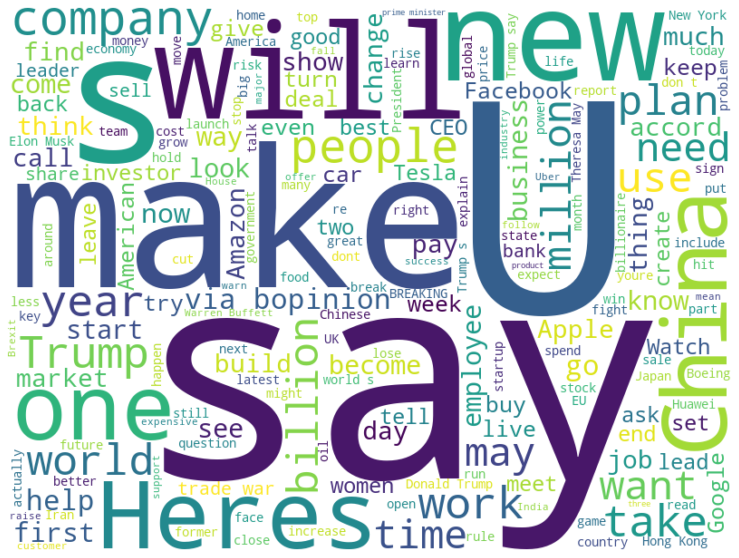

In [8]:
# Upgraded Pip
#!pip install --upgrade pip
#!pip install --upgrade Pillow

#!pip install --upgrade Pillow
#!pip install --upgrade wordcloud
#!pip install --upgrade pyodbc
# Imported the libraries
from wordcloud import WordCloud, STOPWORDS

# Added the custom stop words to the default stop words
stop_words = list(STOPWORDS) 

# Flattened the list of lists into a single list of strings (from the data frame that contains list of lists)
# this is to avoid typeError
Tweet_Bus_flat = [' '.join(sublist) for sublist in Tweet_Bus['text_clean']]

# Created the word cloud object
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=600).generate(' '.join(Tweet_Bus_flat))


# Plotted the word cloud
# Created a figure with custom width and height in inches
plt.figure(figsize=(16, 10))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


# 4)PIPELINE: Generating Logistic Model for Twitter Text vs Binary Classes

In [9]:
# introduced stratification in splits as a next step to handle imbalanced binary classes
X = Tweet_Bus['text_clean']
y = Tweet_Bus['edInput']  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, stratify=y,random_state=21)

In [10]:
# vectorizing the Lemmitized cleaned text from twitter ---
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')


# Assuming X_train is a list of lists of words
X_train = [' '.join(x) for x in X_train]
# Now X_train is a list of strings
train_vec = cv.fit_transform(X_train)



#train_vec = cv.fit_transform(X_train)
# Assuming X_train is a list of lists of words
X_test = [' '.join(x) for x in X_test]
test_vec = cv.transform(X_test)
# Since the column 'edInput' has two classification, it is classification issue
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 23).fit(train_vec, y_train)
lr.score(test_vec, y_test)
# https://regenerativetoday.com/twitter-sentiment-analysis-in-python-sklearn-natural-language-processing/


# ask to see wehther my original x train and y train are fitted well and fine  and the score is fine? 

C:\Users\zohairk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8224803664921466

# 5)PIPELINE: Evaluating , concluding or Validating the model 

In [11]:
#!pip install imblearn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter
from sklearn import metrics

# Generate a synthetic imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, weights=[0.95, 0.05], random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2, random_state=42)

# Check class distribution before RUS
print("Class distribution before RUS:", Counter(y_train))

# Apply Random Under-Sampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Check class distribution after RUS
print("Class distribution after RUS:", Counter(y_train_rus))

from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification
from collections import Counter

# Generate a synthetic imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, weights=[0.1, 0.9], random_state=42)

# Check class distribution before ROS
print("Class distribution before ROS:", Counter(y))

# Apply Random Over-Sampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

# Check class distribution after ROS
print("Class distribution after ROS:", Counter(y_ros))
# Generating RUS and ROS accuracy report after the model
# Generate a synthetic imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, weights=[0.1, 0.9], random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2, random_state=42)

# Apply Random Over-Sampling (ROS)
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Apply Random Under-Sampling (RUS)
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Train Logistic Regression models on both resampled datasets
clf_ros = LogisticRegression(max_iter=1000, random_state=42)
clf_rus = LogisticRegression(max_iter=1000, random_state=42)

clf_ros.fit(X_train_ros, y_train_ros)
clf_rus.fit(X_train_rus, y_train_rus)

# Make predictions on the test set
y_pred_ros = clf_ros.predict(X_test)
y_pred_rus = clf_rus.predict(X_test)

# Evaluate model performance
print("Accuracy (ROS):", accuracy_score(y_test, y_pred_ros))
print("Classification Report (ROS):\n", classification_report(y_test, y_pred_ros))

print("\nAccuracy (RUS):", accuracy_score(y_test, y_pred_rus))
print("Classification Report (RUS):\n", classification_report(y_test, y_pred_rus))

print("----"*8)
print("It is noted: the ROS model's accuracy is increased to 83% as compared to the model (RUS) but the recall value of minority class has also improved to 83 %.\n Comparatively, ROS is a good model, but it has a problem of overfitting. Its Recall is better than RUS, where there is a problem of loss data.")
# Create a confusion matrix
cm_sm = metrics.confusion_matrix(y_test, y_pred_ros)
print(cm_sm, "ROS' Confusion Matrix")

# Create a confusion matrix
cm_sm = metrics.confusion_matrix(y_test, y_pred_rus)
print(cm_sm, "RuS' Confusion Matrix")
print ("tp>fp from Confusion Matrix for both models though but there is a problem of overf itting and loss of data in the models, respectively. ")

Class distribution before RUS: Counter({0: 758, 1: 42})
Class distribution after RUS: Counter({0: 42, 1: 42})
Class distribution before ROS: Counter({1: 895, 0: 105})
Class distribution after ROS: Counter({1: 895, 0: 895})
Accuracy (ROS): 0.8
Classification Report (ROS):
               precision    recall  f1-score   support

           0       0.32      0.81      0.46        21
           1       0.97      0.80      0.88       179

    accuracy                           0.80       200
   macro avg       0.65      0.80      0.67       200
weighted avg       0.90      0.80      0.83       200


Accuracy (RUS): 0.79
Classification Report (RUS):
               precision    recall  f1-score   support

           0       0.32      0.86      0.46        21
           1       0.98      0.78      0.87       179

    accuracy                           0.79       200
   macro avg       0.65      0.82      0.67       200
weighted avg       0.91      0.79      0.83       200

---------------------

>1, train: 1.000, test: 0.870
>2, train: 0.935, test: 0.820
>3, train: 0.944, test: 0.880
>4, train: 0.935, test: 0.875
>5, train: 0.936, test: 0.890
>6, train: 0.925, test: 0.890
>7, train: 0.920, test: 0.905
>8, train: 0.929, test: 0.920
>9, train: 0.911, test: 0.900
>10, train: 0.914, test: 0.910
>11, train: 0.906, test: 0.900
>12, train: 0.909, test: 0.905
>13, train: 0.899, test: 0.895
>14, train: 0.907, test: 0.895
>15, train: 0.897, test: 0.890
>16, train: 0.904, test: 0.900
>17, train: 0.897, test: 0.900
>18, train: 0.900, test: 0.905
>19, train: 0.897, test: 0.900
>20, train: 0.899, test: 0.905
>21, train: 0.895, test: 0.900
>22, train: 0.896, test: 0.900
>23, train: 0.895, test: 0.900
>24, train: 0.899, test: 0.900
>25, train: 0.896, test: 0.900
>26, train: 0.896, test: 0.900
>27, train: 0.896, test: 0.900
>28, train: 0.896, test: 0.900
>29, train: 0.895, test: 0.900
>30, train: 0.896, test: 0.900
>31, train: 0.895, test: 0.900
>32, train: 0.895, test: 0.900
>33, train: 0.895

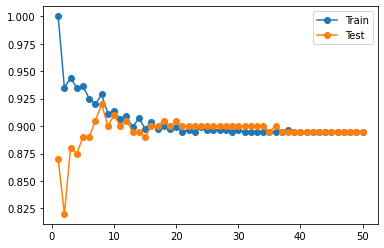

In [12]:
# determing whether the data in the mdels (ROS and RUS) are overfitting or loss in data
from sklearn.neighbors import KNeighborsClassifier

# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 51)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model = KNeighborsClassifier(n_neighbors=i)
 # fit model on the training dataset
 model.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
# ref: https://machinelearningmastery.com/overfitting-machine-learning-models/

In [13]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# Generate a synthetic imbalanced dataset
X, y = make_classification(
    n_classes=2,
    class_sep=1,
    weights=[0.1, 0.9],
    n_informative=3,
    n_redundant=1,
    flip_y=0,
    n_features=20,
    n_clusters_per_class=1,
    n_samples=1000,
    random_state=10
)

# Check class distribution before SMOTE
print("Original dataset shape:", Counter(y))

# Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Check class distribution after SMOTE
print("Resampled dataset shape:", Counter(y_res))



import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score

# Generate a synthetic imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, weights=[0.1, 0.9], random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the dataset
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Train a Logistic Regression model
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print('It is noted: the accuracy is increased to 83% as compared to previous model (RUS) but the recall value of minority class has also improved to 83 %.\n This is a good model compared to the previous two. Recall is great.')
# https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/
# https://www.justintodata.com/imbalanced-data-machine-learning-classification/

# Create a confusion matrix
cm_sm = metrics.confusion_matrix(y_test, y_pred)
print(cm_sm, "SMOTE confusion Matrix")
print ("tp>fp from Confusion Matrix for SMOTE ")

Original dataset shape: Counter({1: 900, 0: 100})
Resampled dataset shape: Counter({0: 900, 1: 900})
Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.81      0.46        21
           1       0.97      0.80      0.88       179

    accuracy                           0.80       200
   macro avg       0.65      0.80      0.67       200
weighted avg       0.90      0.80      0.83       200

It is noted: the accuracy is increased to 83% as compared to previous model (RUS) but the recall value of minority class has also improved to 83 %.
 This is a good model compared to the previous two. Recall is great.
[[ 17   4]
 [ 36 143]] SMOTE confusion Matrix
tp>fp from Confusion Matrix for SMOTE 


>1, train: 1.000, test: 0.870
>2, train: 0.935, test: 0.820
>3, train: 0.944, test: 0.880
>4, train: 0.935, test: 0.875
>5, train: 0.936, test: 0.890
>6, train: 0.925, test: 0.890
>7, train: 0.920, test: 0.905
>8, train: 0.929, test: 0.920
>9, train: 0.911, test: 0.900
>10, train: 0.914, test: 0.910
>11, train: 0.906, test: 0.900
>12, train: 0.909, test: 0.905
>13, train: 0.899, test: 0.895
>14, train: 0.907, test: 0.895
>15, train: 0.897, test: 0.890
>16, train: 0.904, test: 0.900
>17, train: 0.897, test: 0.900
>18, train: 0.900, test: 0.905
>19, train: 0.897, test: 0.900
>20, train: 0.899, test: 0.905
>21, train: 0.895, test: 0.900
>22, train: 0.896, test: 0.900
>23, train: 0.895, test: 0.900
>24, train: 0.899, test: 0.900
>25, train: 0.896, test: 0.900
>26, train: 0.896, test: 0.900
>27, train: 0.896, test: 0.900
>28, train: 0.896, test: 0.900
>29, train: 0.895, test: 0.900
>30, train: 0.896, test: 0.900
>31, train: 0.895, test: 0.900
>32, train: 0.895, test: 0.900
>33, train: 0.895

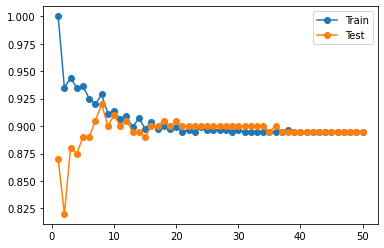

In [14]:
# determing whether the data in the model (SMOTE)) are overfitting or loss in data

# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 51)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model = KNeighborsClassifier(n_neighbors=i)
 # fit model on the training dataset
 model.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
# ref: https://machinelearningmastery.com/overfitting-machine-learning-models/

In [22]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

# Generate a synthetic imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, weights=[0.1, 0.9], random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the dataset
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred = (y_pred > 0.5).astype(int)
# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Make predictions and evaluate performance
y_pred = rf.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
# Create a confusion matrix
cm_sm = metrics.confusion_matrix(y_test, y_pred)
print(cm_sm, "Random Forest Confusion Matrix")
# https://www.datacamp.com/tutorial/diving-deep-imbalanced-data
# in classification , regression is not and rmse 
print ("tp>fp from Confusion Matrix")
# ref: https://www.jcchouinard.com/confusion-matrix-in-scikit-learn/

Accuracy: 0.91

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.53      0.53        19
           1       0.95      0.95      0.95       181

    accuracy                           0.91       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.91      0.91      0.91       200

[[ 10   9]
 [  6 175]] Random Forest Confusion Matrix
tp>fp from Confusion Matrix


>1, train: 1.000, test: 0.890
>2, train: 0.927, test: 0.815
>3, train: 0.944, test: 0.900
>4, train: 0.935, test: 0.900
>5, train: 0.934, test: 0.915
>6, train: 0.926, test: 0.920
>7, train: 0.915, test: 0.910
>8, train: 0.919, test: 0.915
>9, train: 0.917, test: 0.905
>10, train: 0.920, test: 0.915
>11, train: 0.909, test: 0.910
>12, train: 0.912, test: 0.910
>13, train: 0.901, test: 0.905
>14, train: 0.905, test: 0.915
>15, train: 0.900, test: 0.910
>16, train: 0.902, test: 0.910
>17, train: 0.897, test: 0.910
>18, train: 0.900, test: 0.910
>19, train: 0.894, test: 0.910
>20, train: 0.894, test: 0.910
>21, train: 0.892, test: 0.905
>22, train: 0.892, test: 0.905
>23, train: 0.895, test: 0.905
>24, train: 0.894, test: 0.910
>25, train: 0.894, test: 0.910
>26, train: 0.895, test: 0.910
>27, train: 0.894, test: 0.910
>28, train: 0.895, test: 0.910
>29, train: 0.894, test: 0.905
>30, train: 0.895, test: 0.905
>31, train: 0.895, test: 0.905
>32, train: 0.894, test: 0.905
>33, train: 0.895

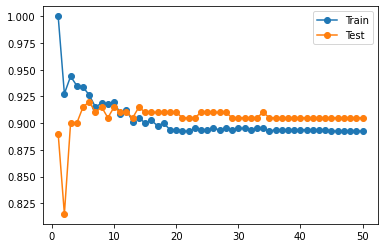

In [16]:
# determing whether the data in the Random forest model are overfitting or loss in data

# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 51)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model = KNeighborsClassifier(n_neighbors=i)
 # fit model on the training dataset
 model.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
# ref: https://machinelearningmastery.com/overfitting-machine-learning-models/

# FINDING THE BEST hyperparameteres for Logistic and Random Forest Model 

In [19]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']
}

# Create Logistic Regression model
logreg = LogisticRegression()

# Perform grid search
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_ * 100)


Best hyperparameters: {'C': 1, 'penalty': 'l2'}
Best accuracy: 91.875


In [21]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter distributions
param_dist = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_depth': [2, 3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create Random Forest model
rf = RandomForestClassifier()

# Perform randomized search
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=5, cv=5)
random_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters:", random_search.best_params_)
print("Best accuracy:", random_search.best_score_ * 100)


Best hyperparameters: {'n_estimators': 500, 'min_samples_split': 5, 'max_depth': 5}
Best accuracy: 92.5


# performance evaluation of the two models

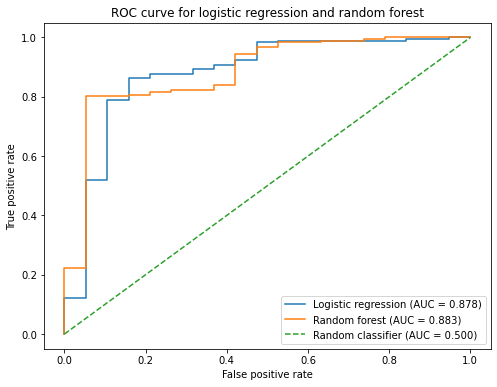

In [25]:
# Import the libraries
from sklearn.metrics import roc_curve, roc_auc_score


clf.fit(X_train, y_train)

rf.fit(X_train, y_train)

# Predict the probabilities of the positive class on the test set
y_prob_logreg = clf.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Get the TPR and FPR for each model at different thresholds
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# Get the AUC for each model
auc_logreg = roc_auc_score(y_test, y_prob_logreg)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# Plot the ROC curve for each model
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f"Logistic regression (AUC = {auc_logreg:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random forest (AUC = {auc_rf:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random classifier (AUC = 0.500)")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve for logistic regression and random forest")
plt.legend()
plt.show()


# Random Forest Classifier is slightly better than Logistic Classifier, especially W/ SMOTE: 
because: Random Over-Sampling (ROS):
In ROS, randomly duplicated samples from the minority class to balance the dataset.
This helped prevent underrepresentation of the minority class.
However, it is known that ROS can lead to overfitting for some models.
Random Under-Sampling (RUS):
In RUS, randomly removed samples from the majority class to balance the dataset.
This helped prevent overfitting to the majority class.
However, it may result in losing valuable information.


# References and notes: 